## Evaluate models

### Owlvit

In [1]:
from aircraft_anomaly_detection.models.owlvit import OwlViT
from aircraft_anomaly_detection.interfaces import Annotation

pred_anns = []
grd_anns = []

for i in range(1, 12):
    # image, label, meta = turbine_ad[i]
    image_path = f"../data/LTAA-FLUX-Small-test-dataset-generated/Generated/Flux_{i}.jpg"
    # image_path = "../data/no_defect/detail_jet-engine-part.jpg"
    texts = ["a clean, undamaged metal surface", "a close-up image of a metal scratch"]

    owlvit = OwlViT()
    ann = owlvit.predict(image_input=image_path, text_prompts=texts, undamaged_idxes=[0], top_k=2)

    pred_anns.append(ann)
    # All damaged
    grd_anns.append(
        Annotation(
            damaged=True,
        )
    )

c:\Users\ronan\miniconda3\envs\cv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from aircraft_anomaly_detection.eval.evaluator import Evaluator

evaluator = Evaluator(pred_anns, grd_anns)
evaluator.eval()

{'accuracy': 1.0, 'f1_score': 1.0}

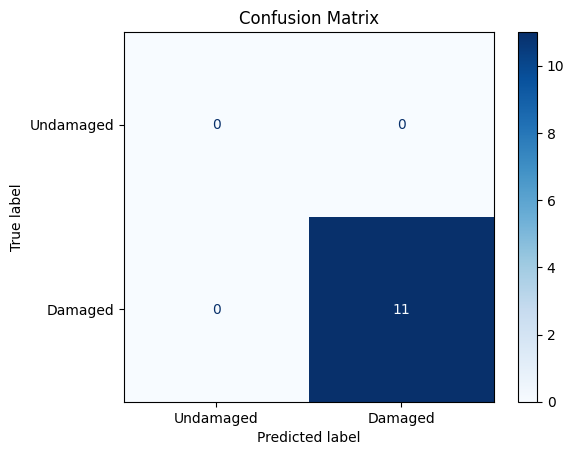

In [3]:
evaluator.plot_confusion_matrix()

### Clip

In [1]:
from aircraft_anomaly_detection.models.clip_predictor import CLIP

predictor = CLIP(class_names=["damaged", "undamaged"], damaged_idxes=[0])

# Predict all images in a folder

anns = predictor.predict("../data/LTAA-FLUX-Small-test-dataset-generated/Generated/")

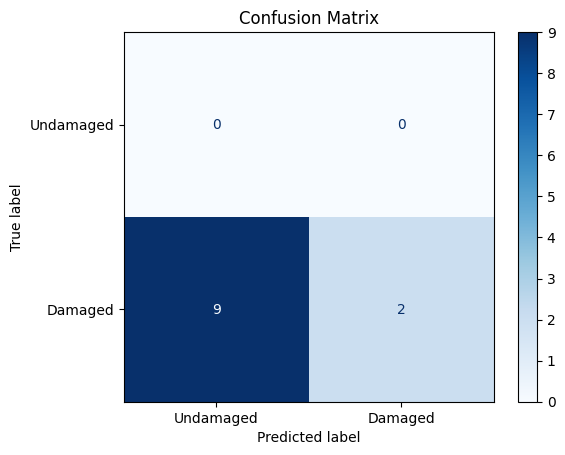

In [4]:
from aircraft_anomaly_detection.eval.evaluator import Evaluator

evaluator = Evaluator(anns, grd_anns)
evaluator.eval()
evaluator.plot_confusion_matrix()